<a href="https://colab.research.google.com/github/Sania9255/Customer-Churn-Data-Preparation-EDA/blob/main/Task04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
netflix = pd.read_csv("netflix_titles.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'], format='mixed')

In [8]:
netflix['director'].fillna('Unknown', inplace=True)
netflix['cast'].fillna('Unknown', inplace=True)
netflix['country'].fillna('Unknown', inplace=True)

/tmp/ipython-input-1770681482.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-1770681482.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [9]:
netflix['release_decade'] = (netflix['release_year'] // 10) * 10

In [10]:
netflix['is_movie'] = netflix['type'].apply(lambda x: 1 if x == 'Movie' else 0)

In [11]:
top_countries = netflix['country'].str.split(', ').explode().value_counts().head(5)
top_countries

,count
country,
United States,3689
India,1046
Unknown,831
United Kingdom,804
Canada,445


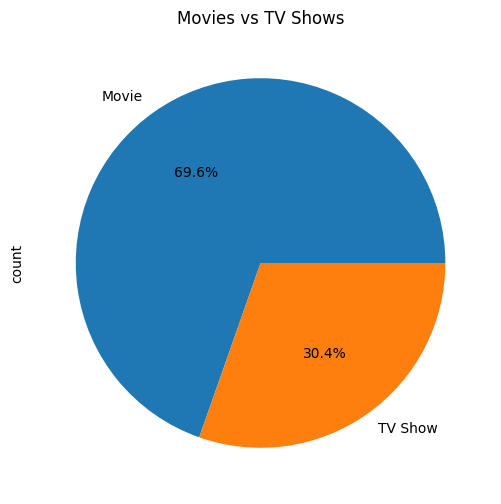

In [13]:
import matplotlib.pyplot as plt

netflix['type'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', figsize=(6,6)
)
plt.title("Movies vs TV Shows")
plt.show()

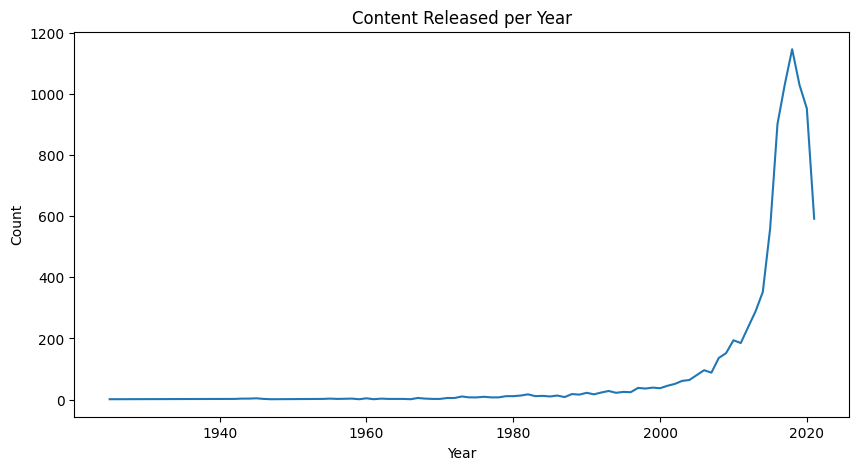

In [14]:
netflix.groupby('release_year').size().plot(figsize=(10,5))
plt.title("Content Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

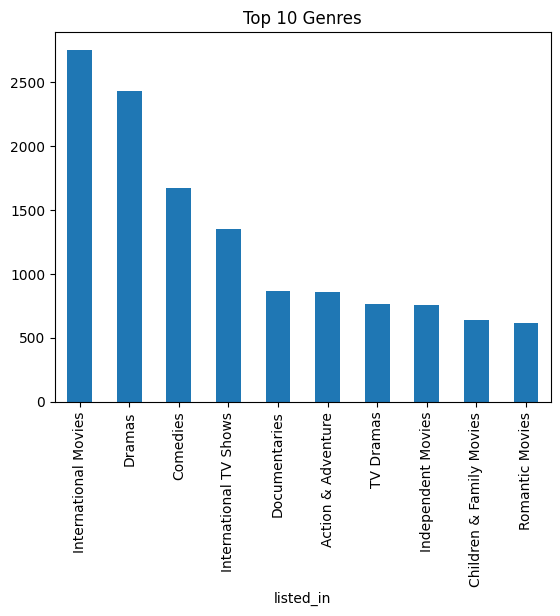

In [15]:
netflix['listed_in'].str.split(', ').explode().value_counts().head(10).plot(
    kind='bar'
)
plt.title("Top 10 Genres")
plt.show()

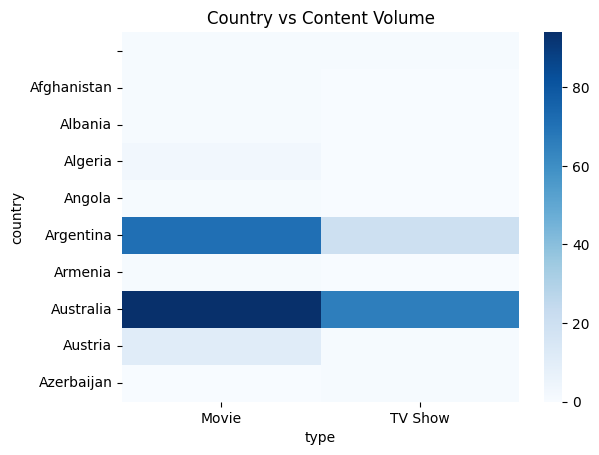

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a temporary DataFrame with exploded countries and corresponding types
exploded_data = netflix.assign(country=netflix['country'].str.split(', ')).explode('country')

# Now, country and type are aligned for crosstab
country_year = pd.crosstab(exploded_data['country'], exploded_data['type'])

sns.heatmap(country_year.head(10), cmap='Blues')
plt.title("Country vs Content Volume")
plt.show()

In [18]:
recent = netflix.groupby('release_year').size().tail(5)
growth_rate = recent.pct_change().mean()

future_1 = recent.iloc[-1] * (1 + growth_rate)
future_2 = future_1 * (1 + growth_rate)

future_1, future_2

(np.float64(526.268437121964), np.float64(467.8352498493152))